In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import matplotlib.dates as mdates

# Load data
df = pd.read_csv("data/main/NVDA.csv")

first few rows for slide #3

In [6]:
# Display the first few rows for slide #3

print(df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  2000-01-03  0.984375  0.992188  0.919271  0.975260   0.894608  30091200
1  2000-01-04  0.958333  0.960938  0.901042  0.949219   0.870721  30048000
2  2000-01-05  0.921875  0.937500  0.904948  0.917969   0.842055  18835200
3  2000-01-06  0.917969  0.917969  0.822917  0.858073   0.787112  12048000
4  2000-01-07  0.854167  0.881510  0.841146  0.872396   0.800251   7118400


Slide 4: Key Observations from EDA

Trading Volume Trend Over Time

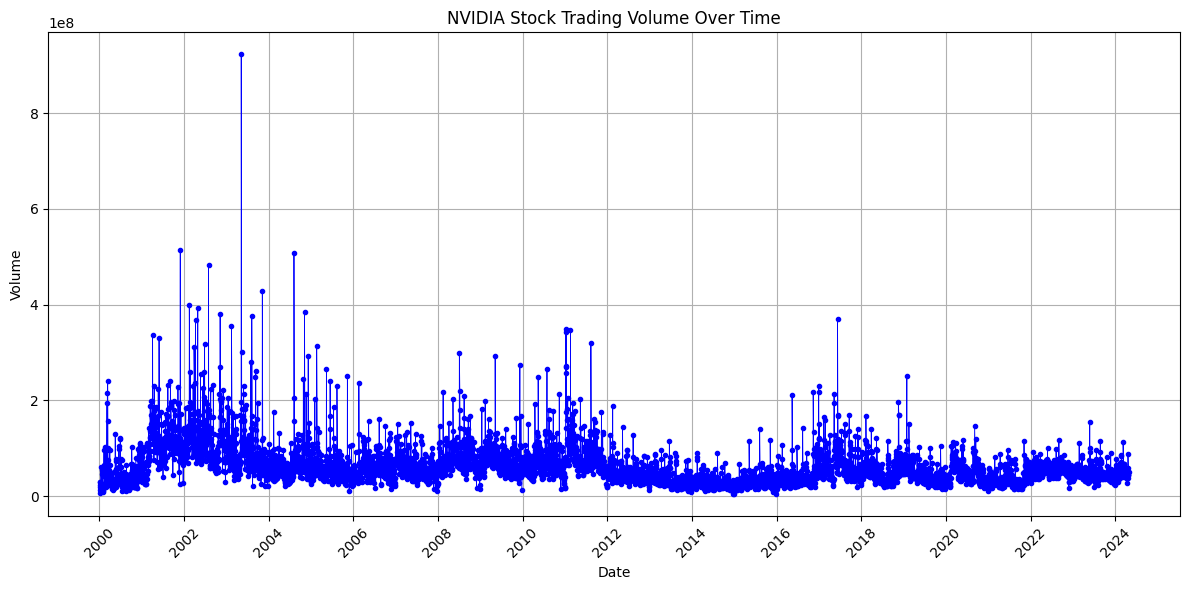

In [7]:
# Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='blue', marker='o', markersize=3, linestyle='-', linewidth=0.6)
plt.title("NVIDIA Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)

# Format x-axis for readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation Matrix of Features

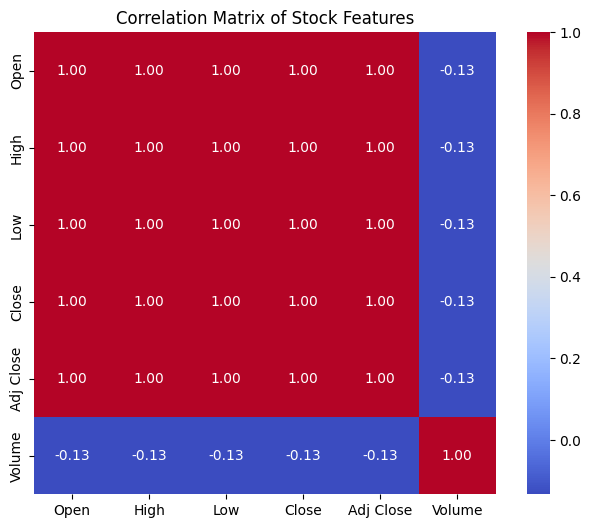

In [8]:
# Select relevant columns for the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=True, fmt=".2f")
plt.title("Correlation Matrix of Stock Features")
plt.show()

Slide 7: Training, Testing, and Optimization Process

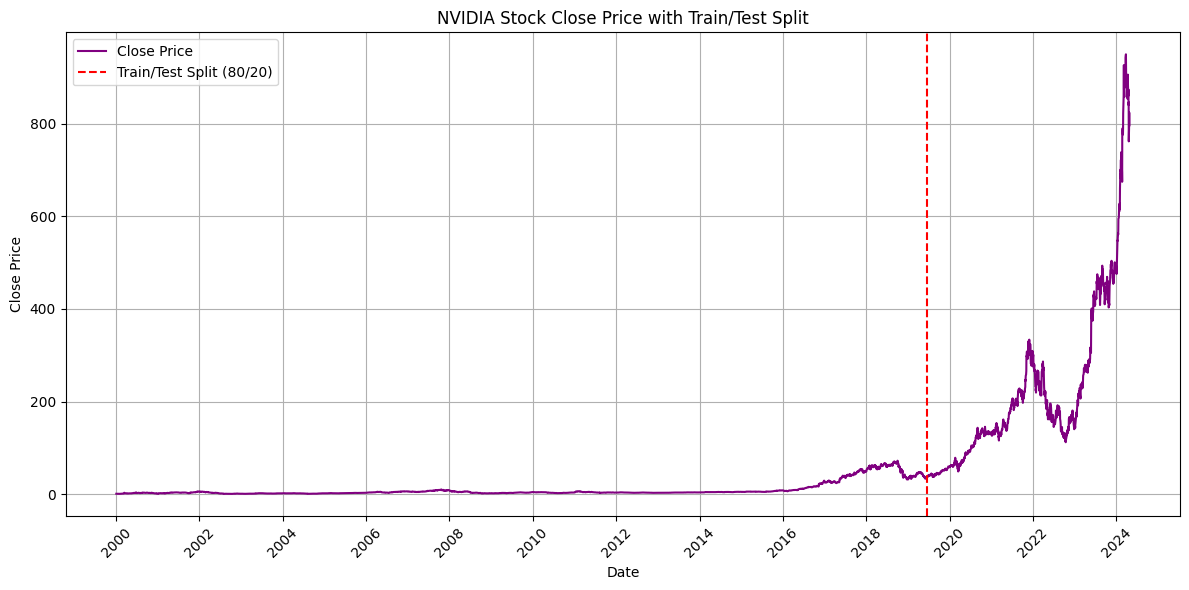

In [9]:
# Define the training and testing split (80% training, 20% testing)
split_point = int(0.8 * len(df))
split_date = df['Date'].iloc[split_point]

# Plot Close price with the training/testing split
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='purple')
plt.axvline(split_date, color='red', linestyle='--', label="Train/Test Split (80/20)")
plt.title("NVIDIA Stock Close Price with Train/Test Split")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Slide 8: Comprehensive Model Evaluation Metrics

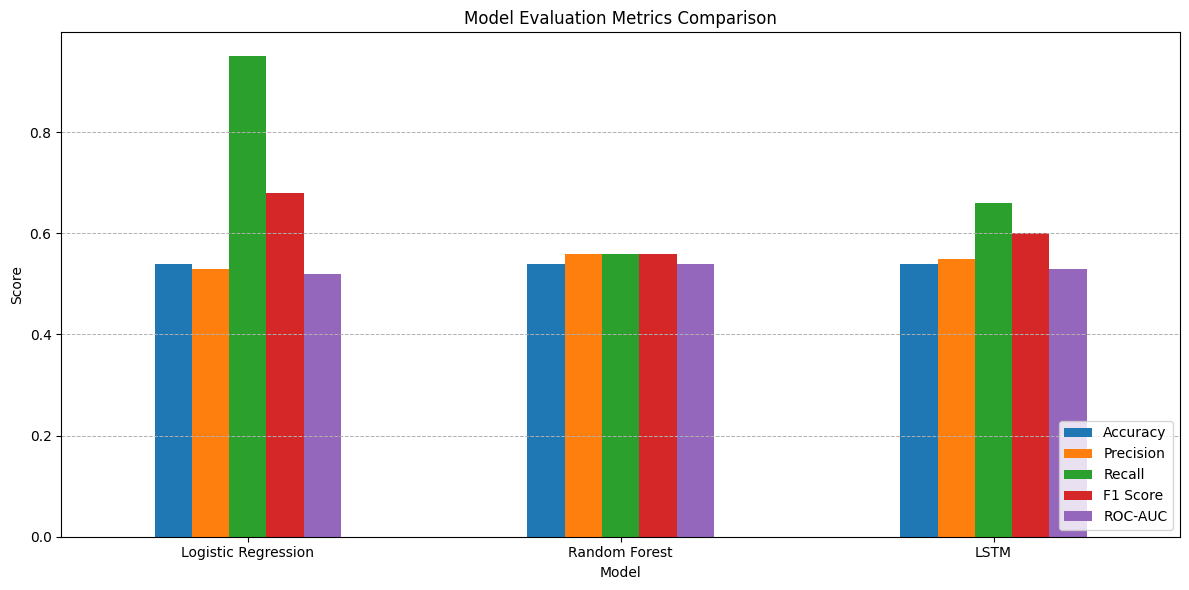

In [10]:
# Data with calculated metrics for each model
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'LSTM'],
    'Accuracy': [0.54, 0.54, 0.54],
    'Precision': [0.53, 0.56, 0.55],
    'Recall': [0.95, 0.56, 0.66],
    'F1 Score': [0.68, 0.56, 0.6],
    'ROC-AUC': [0.52, 0.54, 0.53]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set 'Model' as the index for easy plotting
metrics_df.set_index('Model', inplace=True)

# Plot the metrics for each model
metrics_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Model Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()
